In [311]:
import requests as req 
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import time
import os
from urllib.request import urlretrieve
from selenium import webdriver as wb 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By

In [2]:
apart = pd.read_csv('data/Apart Deal.csv')
apart

## 지역코드, 법정동, 아파트, 지번, 전용면적(?), 층, 건축년도,

C:\Users\smhrd\AppData\Local\Temp\ipykernel_11040\2692137691.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  apart = pd.read_csv('data/Apart Deal.csv')


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [133]:
nanUpdate = apart.copy()

const_list = []
const_list.append(['조촌동', '더샵디오션시티', '2021'])
const_list.append(['무실동', '더샵원주센트럴파크1단지', '2021'])
const_list.append(['중앙동', '힐스테이트속초센트럴', '2021'])
const_list.append(['가평읍 읍내리', '가평코아루', '2021'])
const_list.append(['송도동', '더샵송도프라임뷰25BL', '2022'])
const_list.append(['오산동', '동탄역유림노르웨이숲', '2022'])
const_list.append(['양촌읍 양곡리', 'My더퍼스트', '2022'])
const_list.append(['신암동', 'SG펠리체', '2021'])


for i in const_list :
    temp = nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])].fillna(i[2]) 
    nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])] = temp

## 지번 NaN 값 채우기 


## 
jibun_list = []
jibun_list.append(['남양읍 남양리', '동광뷰엘', '2235'])
jibun_list.append(['내곡동', '서초포레스타2단지', '384'])
jibun_list.append(['자곡동', '래미안포레', '687'])
jibun_list.append(['신원동', '힐스테이트 서초 젠트리스', '557'])
jibun_list.append(['나성동', '나릿재마을1단지', '259-1'])

for i in jibun_list :
    temp = nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])].fillna(i[2])
    nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])] = temp
    
nanUpdate

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [134]:
apart_copy = nanUpdate.copy()

# 거래금액데이터 정제

In [135]:
apart_copy['거래금액'] = apart_copy['거래금액'].astype(str)
apart_copy['거래금액'] = apart_copy['거래금액'].str.replace(',', '')
apart_copy['거래금액'] = apart_copy['거래금액'].astype(int)

# 시도 컬럼 추가

In [136]:
sido = pd.read_csv('data/시도컬럼.csv')
sido

,Unnamed: 0,지역코드,시도,지역이름
0,0,31110,울산,중구
1,1,31110,울산,중구
2,2,31110,울산,중구
3,3,31110,울산,중구
4,4,31110,울산,중구
...,...,...,...,...
5002834,5002834,50130,제주,서귀포시
5002835,5002835,50130,제주,서귀포시
5002836,5002836,50130,제주,서귀포시
5002837,5002837,50130,제주,서귀포시


In [137]:
sido = sido.drop('Unnamed: 0',axis=1)


In [138]:
sido = sido.drop('지역코드',axis=1)

In [139]:
sido

,시도,지역이름
0,울산,중구
1,울산,중구
2,울산,중구
3,울산,중구
4,울산,중구
...,...,...
5002834,제주,서귀포시
5002835,제주,서귀포시
5002836,제주,서귀포시
5002837,제주,서귀포시


In [140]:
apart_rev1 = apart_copy.copy()

In [141]:
apart_rev1 = pd.concat([apart_rev1,sido], axis = 1)
apart_rev1

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,시도,지역이름
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,울산,중구
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,울산,중구
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,울산,중구
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,울산,중구
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,울산,중구
...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,19500,제주,서귀포시
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,21700,제주,서귀포시
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,9300,제주,서귀포시
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,25500,제주,서귀포시


In [142]:
apart_rev2  = apart_rev1.copy()

# 시도별 평균 임금 데이터 처리

In [18]:
mean_income_sido = pd.read_csv('data/행정구역_시도___산업_규모별_임금_및_근로시간_상용근로자_상용근로자_5인이상_사업체__20240102124051.csv',encoding= 'euc-kr')

In [36]:
mean_income_sido

,시도,산업분류별,규모별,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7
0,지역별,산업분류별,규모별,상용근로일수 (일),상용총근로시간 (시간),상용소정실근로시간 (시간),상용초과근로시간 (시간),상용월급여액 (원),상용정액급여 (원),상용초과급여 (원),상용특별급여 (원)
1,전국(5인이상),전체,전규모(5인이상),21.8,181.8,170.9,10.9,3405769,3164630,241140,373851
2,서울,전체,전규모(5인이상),21.6,177.5,171.5,5.9,3704202,3554867,149335,521900
3,부산,전체,전규모(5인이상),21.9,181.0,172.6,8.4,3050186,2868469,181717,265008
4,대구,전체,전규모(5인이상),22.2,184.7,172.6,12.1,2908433,2679240,229192,185373
5,인천,전체,전규모(5인이상),21.9,183.0,172.5,10.5,3121843,2896765,225078,269077
6,광주,전체,전규모(5인이상),22.0,179.3,171.5,7.9,2942622,2717458,225164,335405
7,대전,전체,전규모(5인이상),21.6,175.9,168.9,7.0,3287005,3130710,156296,314723
8,울산,전체,전규모(5인이상),22.0,184.3,167.9,16.4,3377777,2965650,412127,975581
9,경기,전체,전규모(5인이상),21.9,184.2,173.1,11.2,3384598,3147200,237398,313931


In [ ]:
mean_income_sido = mean_income_sido.rename(columns={"지역별" : "시도"})

In [43]:
mean_income_sido_real = mean_income_sido[['시도','2019.4']]
mean_income_sido_real

,시도,2019.4
0,지역별,상용월급여액 (원)
1,전국(5인이상),3405769
2,서울,3704202
3,부산,3050186
4,대구,2908433
5,인천,3121843
6,광주,2942622
7,대전,3287005
8,울산,3377777
9,경기,3384598


In [44]:
mean_income_sido_real.drop(0, inplace= True)

C:\Users\smhrd\AppData\Local\Temp\ipykernel_11040\1180924325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_income_sido_real.drop(0, inplace= True)


In [45]:
mean_income_sido_real = mean_income_sido_real.rename(columns={"2019.4" : "급여평균"})
mean_income_sido_real

,시도,급여평균
1,전국(5인이상),3405769
2,서울,3704202
3,부산,3050186
4,대구,2908433
5,인천,3121843
6,광주,2942622
7,대전,3287005
8,울산,3377777
9,경기,3384598
10,강원,3049958


# 평당 거래 금액 (서울 하위권)

In [143]:
apart_rev2['평수'] = round(apart_rev2['전용면적']/3.305785,1)
apart_rev2

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,시도,지역이름,평수
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,울산,중구,41.0
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,울산,중구,30.7
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,울산,중구,25.7
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,울산,중구,35.9
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,울산,중구,25.7
...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,19500,제주,서귀포시,17.3
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,21700,제주,서귀포시,15.1
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,9300,제주,서귀포시,13.7
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,25500,제주,서귀포시,15.7


In [144]:
apart_rev2['평당거래금액'] = round(apart_rev2['거래금액']/apart_rev2['평수'],1)
apart_rev2

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,시도,지역이름,평수,평당거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,울산,중구,41.0,651.2
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,울산,중구,30.7,1156.4
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,울산,중구,25.7,1420.2
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,울산,중구,35.9,1197.8
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,울산,중구,25.7,1505.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,19500,제주,서귀포시,17.3,1127.2
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,21700,제주,서귀포시,15.1,1437.1
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,9300,제주,서귀포시,13.7,678.8
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,25500,제주,서귀포시,15.7,1624.2


# 평당금액이 가장 비싼 아파트는?

In [147]:
apart_rev2

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,시도,지역이름,평수,평당거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,울산,중구,41.0,651.2
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,울산,중구,30.7,1156.4
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,울산,중구,25.7,1420.2
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,울산,중구,35.9,1197.8
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,울산,중구,25.7,1505.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,19500,제주,서귀포시,17.3,1127.2
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,21700,제주,서귀포시,15.1,1437.1
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,9300,제주,서귀포시,13.7,678.8
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,25500,제주,서귀포시,15.7,1624.2


In [148]:
mean_apart = apart_rev2.groupby(['아파트','시도','지역이름','법정동'],as_index = False).agg(평균거래금액=('거래금액','mean')).sort_values('평균거래금액',ascending = False)
mean_apart

,아파트,시도,지역이름,법정동,평균거래금액
728,PH129,서울,강남구,청담동,1.195814e+06
36930,파르크한남,서울,용산구,한남동,1.185714e+06
12582,르가든더메인한남,서울,용산구,한남동,7.742857e+05
5473,나인원한남,서울,용산구,한남동,7.720000e+05
42501,효성빌라청담101(B동),서울,강남구,청담동,7.470000e+05
...,...,...,...,...,...
42346,황등,전북,익산시,황등면 율촌리,1.319545e+03
19491,새한임대,충북,충주시,목행동,1.265000e+03
25485,안강장미마을,경북,경주시,안강읍 산대리,1.250000e+03
8224,대원,강원,동해시,발한동,1.105283e+03


In [107]:
mean_apart_top15 = mean_apart.head(15)
mean_apart_top15

,아파트,시도,지역이름,법정동,평균거래금액
728,PH129,서울,강남구,청담동,1.195814e+06
36930,파르크한남,서울,용산구,한남동,1.185714e+06
12582,르가든더메인한남,서울,용산구,한남동,7.742857e+05
5473,나인원한남,서울,용산구,한남동,7.720000e+05
42501,효성빌라청담101(B동),서울,강남구,청담동,7.470000e+05
25432,아크로서울포레스트,서울,성동구,성수동1가,6.830000e+05
19291,상지리츠빌카일룸2차,서울,강남구,청담동,6.383750e+05
1870,갤러리아포레,서울,성동구,성수동1가,6.371667e+05
34924,청담어퍼하우스,서울,강남구,청담동,6.333333e+05
19288,상지리츠빌카일룸,서울,강남구,도곡동,5.802333e+05


# 위 top15 아파트들의 거래 건수를 찾고 병합

In [158]:
apart_deal_count = apart_rev2.groupby('아파트',as_index=False).agg(거래건수=('아파트','count'))
apart_deal_count

,아파트,거래건수
0,(1-102),6
1,(1018-8),4
2,(1028-0),67
3,(1088-1),4
4,(1101-1),127
...,...,...
36436,힐팰리스,16
36437,힐포레아파트,10
36438,힐하우스,6
36439,힐하우스(577-79),1


In [178]:
mean_apart_top15_count = pd.merge(mean_apart_top15,apart_deal_count, how='left',on='아파트')

In [181]:
mean_apart_top15_count['아파트_시도_법정동'] = mean_apart_top15_count['아파트']+'_'+mean_apart_top15_count['시도']+'_'+mean_apart_top15_count['법정동']

In [168]:
mean_apart_top15_count

,아파트,시도,지역이름,법정동,평균거래금액,거래건수,아파트_시도
0,PH129,서울,강남구,청담동,1.195814e+06,5,PH129_서울
1,파르크한남,서울,용산구,한남동,1.185714e+06,7,파르크한남_서울
2,르가든더메인한남,서울,용산구,한남동,7.742857e+05,7,르가든더메인한남_서울
3,나인원한남,서울,용산구,한남동,7.720000e+05,14,나인원한남_서울
4,효성빌라청담101(B동),서울,강남구,청담동,7.470000e+05,2,효성빌라청담101(B동)_서울
5,아크로서울포레스트,서울,성동구,성수동1가,6.830000e+05,14,아크로서울포레스트_서울
6,상지리츠빌카일룸2차,서울,강남구,청담동,6.383750e+05,8,상지리츠빌카일룸2차_서울
7,갤러리아포레,서울,성동구,성수동1가,6.371667e+05,12,갤러리아포레_서울
8,청담어퍼하우스,서울,강남구,청담동,6.333333e+05,3,청담어퍼하우스_서울
9,상지리츠빌카일룸,서울,강남구,도곡동,5.802333e+05,6,상지리츠빌카일룸_서울


In [179]:
mean_apart_top15_count['평균거래금액'] = (mean_apart_top15_count['평균거래금액']*10000)/100000000
mean_apart_top15_count

,아파트,시도,지역이름,법정동,평균거래금액,거래건수
0,PH129,서울,강남구,청담동,119.581400,5
1,파르크한남,서울,용산구,한남동,118.571429,7
2,르가든더메인한남,서울,용산구,한남동,77.428571,7
3,나인원한남,서울,용산구,한남동,77.200000,14
4,효성빌라청담101(B동),서울,강남구,청담동,74.700000,2
5,아크로서울포레스트,서울,성동구,성수동1가,68.300000,14
6,상지리츠빌카일룸2차,서울,강남구,청담동,63.837500,8
7,갤러리아포레,서울,성동구,성수동1가,63.716667,12
8,청담어퍼하우스,서울,강남구,청담동,63.333333,3
9,상지리츠빌카일룸,서울,강남구,도곡동,58.023333,6


# 그래프로 표현

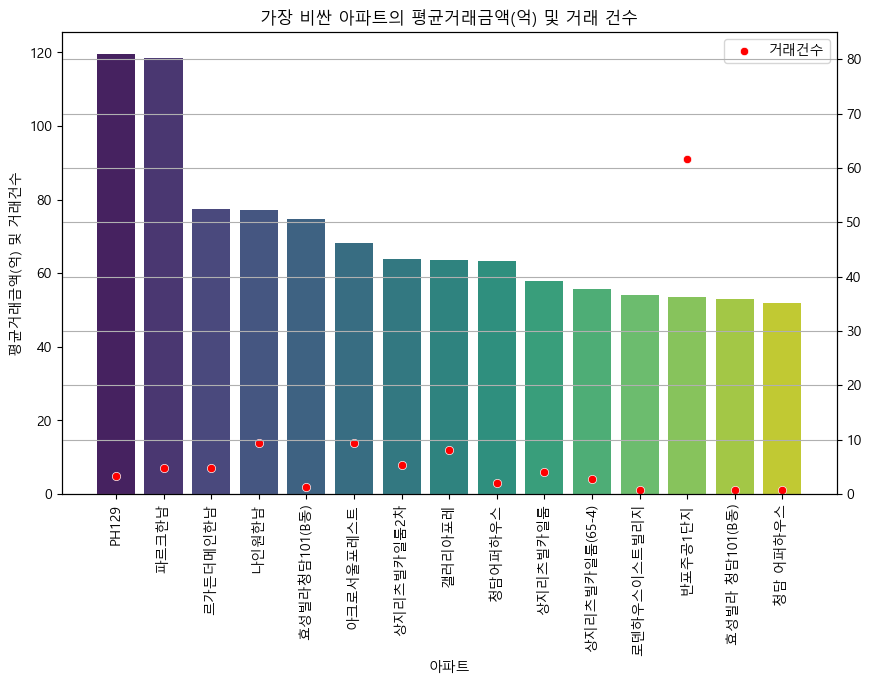

In [258]:


plt.figure(figsize=(10, 6))

sns.barplot(x='아파트', y='평균거래금액', data= mean_apart_top15_count, palette='viridis')

sns.scatterplot(data = mean_apart_top15_count, x= '아파트', y= '거래건수',color = 'red',label='거래건수')

plt.title('가장 비싼 아파트의 평균거래금액(억) 및 거래 건수')

plt.xlabel('아파트')

plt.ylabel('평균거래금액(억) 및 거래건수')

plt.xticks(rotation = 90)

plt.twinx()

plt.ylim(0, 85)

plt.grid()

plt.show()


# # 평균거래금액(억)에 대한 barplot
# ax1 = plt.subplot(121)
# sns.barplot(x='평균거래금액', y='아파트', data=mean_apart_top15_count, palette='viridis', ax=ax1)
# ax1.set(title='아파트별 평균거래금액(억)', xlabel='평균거래금액(억 원)', ylabel='아파트')

# # 거래건수에 대한 scatterplot
# ax2 = plt.subplot(122)
# sns.scatterplot(x='거래건수', y='아파트', data=mean_apart_top15_count, color='orange', ax=ax2)
# ax2.set(title='아파트별 거래건수', xlabel='거래건수', ylabel='아파트')

# plt.tight_layout()
# plt.show()

# 가장비싼 아파트들의 법정동은?

In [149]:
mean_apart_top15.groupby('법정동',as_index = False).agg(개수 =('법정동','count'))

,법정동,개수
0,도곡동,2
1,반포동,1
2,삼성동,1
3,성수동1가,2
4,청담동,6
5,한남동,3


# 수도권의 평당 거래금액이 낮은 동은?

In [150]:
apart_rev2

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,시도,지역이름,평수,평당거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,울산,중구,41.0,651.2
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,울산,중구,30.7,1156.4
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,울산,중구,25.7,1420.2
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,울산,중구,35.9,1197.8
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,울산,중구,25.7,1505.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,19500,제주,서귀포시,17.3,1127.2
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,21700,제주,서귀포시,15.1,1437.1
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,9300,제주,서귀포시,13.7,678.8
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,25500,제주,서귀포시,15.7,1624.2


In [151]:
apart_seoul = apart_rev2.query('시도 =="서울"')

In [152]:
apart_seoul_mean = apart_seoul.groupby(['법정동','시도'],as_index = False).agg(평당평균거래금액=('평당거래금액','mean'))
apart_seoul_mean

,법정동,시도,평당평균거래금액
0,가락동,서울,3687.449506
1,가리봉동,서울,1502.856923
2,가산동,서울,2387.825985
3,가양동,서울,2633.283586
4,갈월동,서울,2660.377778
...,...,...,...
328,효창동,서울,3186.542921
329,후암동,서울,2624.911940
330,휘경동,서울,2215.494983
331,흑석동,서울,3492.287623


In [153]:
apart_seoul_mean['평당평균거래금액'] = round(apart_seoul_mean['평당평균거래금액'],1)

In [154]:
apart_seoul_mean.sort_values('평당평균거래금액').head(15)

,법정동,시도,평당평균거래금액
108,미근동,서울,1005.5
192,안암동4가,서울,1008.8
261,장충동2가,서울,1040.5
298,필동1가,서울,1060.8
74,동선동5가,서울,1129.6
72,동선동3가,서울,1141.0
191,안암동3가,서울,1186.3
130,산림동,서울,1396.8
95,명륜3가,서울,1428.7
20,구산동,서울,1481.2


# 시도별 거래금액

In [214]:
sido_mean_deal_cash = apart_rev2.groupby('시도',as_index=False).agg(시도별_평균_거래금액=('거래금액','mean'))
sido_mean_deal_cash

,시도,시도별_평균_거래금액
0,강원,14856.208515
1,경기,34478.309203
2,경남,19832.727376
3,경북,15258.608873
4,광주,21739.658127
5,대구,29164.252630
6,대전,24252.718238
7,부산,29335.039225
8,서울,67312.256069
9,세종,37063.270235


In [215]:
sido_mean_deal_cash['시도별_평균_거래금액'] = round((sido_mean_deal_cash['시도별_평균_거래금액']*10000)/100000000,1)
sido_mean_deal_cash

,시도,시도별_평균_거래금액
0,강원,1.5
1,경기,3.4
2,경남,2.0
3,경북,1.5
4,광주,2.2
5,대구,2.9
6,대전,2.4
7,부산,2.9
8,서울,6.7
9,세종,3.7


In [231]:
sido_mean_deal_cash = sido_mean_deal_cash.sort_values('시도별_평균_거래금액',ascending = False)
sido_mean_deal_cash

,시도,시도별_평균_거래금액
8,서울,6.7
9,세종,3.7
1,경기,3.4
5,대구,2.9
7,부산,2.9
11,인천,2.8
14,제주,2.6
10,울산,2.5
6,대전,2.4
4,광주,2.2


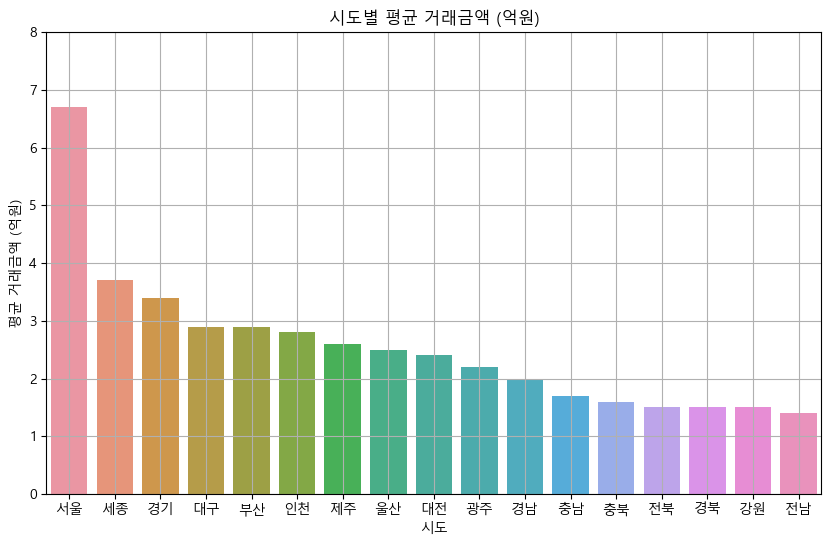

<Figure size 640x480 with 0 Axes>

In [256]:
plt.figure(figsize = (10,6))

sns.barplot(data = sido_mean_deal_cash, x= '시도', y= '시도별_평균_거래금액')

# plt.xticks(rotation = 45)
plt.ylabel('평균 거래금액 (억원)')
plt. ylim(0,8)
plt.title('시도별 평균 거래금액 (억원)')
plt.grid()
plt.show()


plt.savefig('./data/시도별 평균 거래금액 (억원).jpg')

# 시도별 평수당 거래금액

In [239]:
sido_pyung_deal_cash = apart_rev2.groupby('시도',as_index = False).agg(시도별_평수당_거래금액=('평당거래금액','mean'))
sido_pyung_deal_cash

,시도,시도별_평수당_거래금액
0,강원,688.591478
1,경기,1468.145504
2,경남,876.550486
3,경북,670.709053
4,광주,939.436213
5,대구,1191.282491
6,대전,1020.858526
7,부산,1230.228286
8,서울,2856.008601
9,세종,1567.020347


In [240]:
## 10000 곱하기 나누기 100만

sido_pyung_deal_cash['시도별_평수당_거래금액'] = round((sido_pyung_deal_cash['시도별_평수당_거래금액']*10000)/10000000,1)
sido_pyung_deal_cash

,시도,시도별_평수당_거래금액
0,강원,0.7
1,경기,1.5
2,경남,0.9
3,경북,0.7
4,광주,0.9
5,대구,1.2
6,대전,1.0
7,부산,1.2
8,서울,2.9
9,세종,1.6


In [245]:
sido_pyung_deal_cash_sort = sido_pyung_deal_cash.sort_values('시도별_평수당_거래금액',ascending=False)
sido_pyung_deal_cash_sort

,시도,시도별_평수당_거래금액
8,서울,2.9
9,세종,1.6
1,경기,1.5
5,대구,1.2
7,부산,1.2
11,인천,1.2
14,제주,1.2
10,울산,1.1
6,대전,1.0
2,경남,0.9


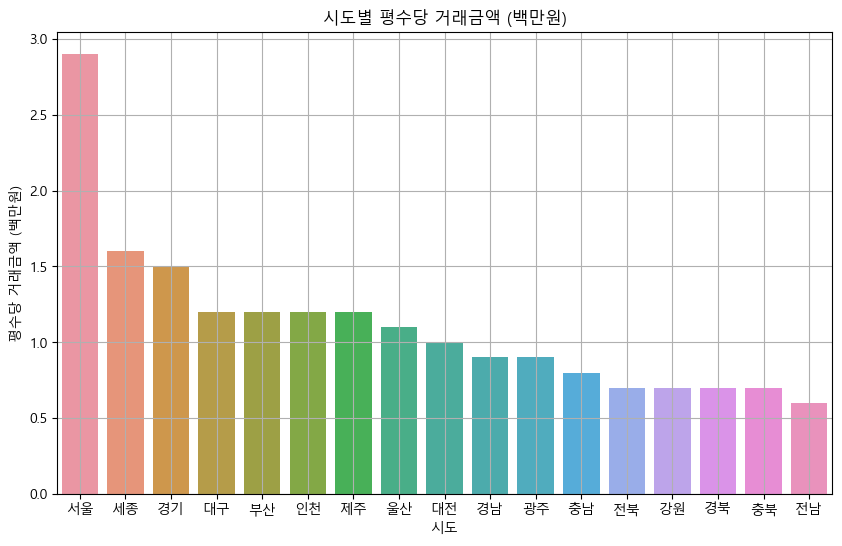

<Figure size 640x480 with 0 Axes>

In [257]:
plt.figure(figsize = (10,6))

sns.barplot(data = sido_pyung_deal_cash_sort, x= '시도', y= '시도별_평수당_거래금액')

# plt.xticks(rotation = 45)
plt.ylabel('평수당 거래금액 (백만원)')

plt.title('시도별 평수당 거래금액 (백만원)')
plt.grid()
plt.show()

plt.savefig('./data/시도별 평수당 거래금액 (백만원).jpeg')

# 년월일 데이터 넣기

In [ ]:
apart_rev3 = apart_rev3.copy 

In [260]:
yymmdd = pd.read_csv('date_oranize_real_real.csv')
yymmdd

,Unnamed: 0,year,month,day
0,0,2020,5,30
1,1,2020,1,3
2,2,2020,1,3
3,3,2020,1,3
4,4,2020,1,4
...,...,...,...,...
5002834,5002834,2023,6,29
5002835,5002835,2023,7,4
5002836,5002836,2023,7,4
5002837,5002837,2023,7,1


In [261]:
yymmdd = yymmdd.drop('Unnamed: 0',axis = 1)
yymmdd

,year,month,day
0,2020,5,30
1,2020,1,3
2,2020,1,3
3,2020,1,3
4,2020,1,4
...,...,...,...
5002834,2023,6,29
5002835,2023,7,4
5002836,2023,7,4
5002837,2023,7,1


In [266]:
apart_rev3 = pd.concat([apart_rev2,yymmdd],axis=1)
apart_rev3

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,시도,지역이름,평수,평당거래금액,year,month,day
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,울산,중구,41.0,651.2,2020,5,30
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,울산,중구,30.7,1156.4,2020,1,3
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,울산,중구,25.7,1420.2,2020,1,3
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,울산,중구,35.9,1197.8,2020,1,3
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,울산,중구,25.7,1505.8,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,19500,제주,서귀포시,17.3,1127.2,2023,6,29
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,21700,제주,서귀포시,15.1,1437.1,2023,7,4
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,9300,제주,서귀포시,13.7,678.8,2023,7,4
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,25500,제주,서귀포시,15.7,1624.2,2023,7,1


# 하위 5개동의 평당 평균 거래 금액

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,시도,지역이름,평수,평당거래금액
221277,42230.0,성북동,9/24/2020 0:00,명보1,67-1,59.85,1,1991.0,5800,강원,삼척시,18.1,320.4
221304,42230.0,성북동,10/10/2020 0:00,명보1,67-1,59.85,3,1991.0,5000,강원,삼척시,18.1,276.2
298428,46170.0,성북동,1/7/2020 0:00,성북주공,11,46.98,2,1989.0,5400,전남,나주시,14.2,380.3
298429,46170.0,성북동,1/10/2020 0:00,성북주공,11,46.68,5,1989.0,4000,전남,나주시,14.1,283.7
298507,46170.0,성북동,2/6/2020 0:00,성북주공,11,46.98,2,1989.0,5000,전남,나주시,14.2,352.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956502,46170.0,성북동,2022-08-13 00:00:00,성북주공,11,39.30,2,1989.0,8000,전남,나주시,11.9,672.3
4956687,46170.0,성북동,2022-12-30 00:00:00,성북주공,11,39.60,5,1989.0,6150,전남,나주시,12.0,512.5
4956725,46170.0,성북동,2023-01-15 00:00:00,성북주공,11,39.30,1,1989.0,6000,전남,나주시,11.9,504.2
4956789,46170.0,성북동,2023-02-18 00:00:00,성북주공,11,46.98,3,1989.0,5000,전남,나주시,14.2,352.1


In [283]:
apartS = apart_rev3.query('시도 =="서울"')
apartS = apartS.query('year == 2022')
apartS = apartS.groupby('법정동',as_index = False).agg(평당평균거래금액 = ('평당거래금액','mean')).sort_values('평당평균거래금액').head(5)
apartS['평당평균거래금액(백만원)'] = apartS['평당평균거래금액'].round(1)
apartS['2024 평당평균예상금액(백만원)'] = apartS['평당평균거래금액(백만원)']*1.116
apartS

,법정동,평당평균거래금액,평당평균거래금액(백만원),2024 평당평균예상금액(백만원)
170,안암동4가,962.466667,962.5,1074.1500
233,장충동2가,1425.300000,1425.3,1590.6348
221,이화동,1431.400000,1431.4,1597.4424
171,안암동5가,1637.700000,1637.7,1827.6732
136,성북동,1836.700000,1836.7,2049.7572


In [284]:
apartS['15평'] = apartS['평당평균거래금액(백만원)']*15

In [285]:
apartS = apartS.drop('2024 평당평균예상금액(백만원)',axis=1)
apartS

,법정동,평당평균거래금액,평당평균거래금액(백만원),15평
170,안암동4가,962.466667,962.5,14437.5
233,장충동2가,1425.300000,1425.3,21379.5
221,이화동,1431.400000,1431.4,21471.0
171,안암동5가,1637.700000,1637.7,24565.5
136,성북동,1836.700000,1836.7,27550.5


In [286]:
apartS['2024년 15평 예상금액'] = apartS['15평'] * 1.16

In [287]:
apartS

,법정동,평당평균거래금액,평당평균거래금액(백만원),15평,2024년 15평 예상금액
170,안암동4가,962.466667,962.5,14437.5,16747.50
233,장충동2가,1425.300000,1425.3,21379.5,24800.22
221,이화동,1431.400000,1431.4,21471.0,24906.36
171,안암동5가,1637.700000,1637.7,24565.5,28495.98
136,성북동,1836.700000,1836.7,27550.5,31958.58


In [288]:
apartS['평당평균거래금액'] = round(apartS['평당평균거래금액']*10000/1000000,1)
apartS

,법정동,평당평균거래금액,평당평균거래금액(백만원),15평,2024년 15평 예상금액
170,안암동4가,9.6,962.5,14437.5,16747.50
233,장충동2가,14.3,1425.3,21379.5,24800.22
221,이화동,14.3,1431.4,21471.0,24906.36
171,안암동5가,16.4,1637.7,24565.5,28495.98
136,성북동,18.4,1836.7,27550.5,31958.58


In [289]:
apartS['15평(억원)'] = round(apartS['15평']*10000/100000000,1)

In [291]:
apartS = apartS.drop('15평',axis = 1)

In [293]:
apartS  = apartS.drop('평당평균거래금액(백만원)',axis = 1)

In [295]:
apartS['2024년 15평 예상금액(억원)'] = round(apartS['2024년 15평 예상금액']*10000/100000000,1)

In [297]:
apartS = apartS.drop('2024년 15평 예상금액',axis = 1)

In [298]:
apartS

,법정동,평당평균거래금액,15평(억원),2024년 15평 예상금액(억원)
170,안암동4가,9.6,1.4,1.7
233,장충동2가,14.3,2.1,2.5
221,이화동,14.3,2.1,2.5
171,안암동5가,16.4,2.5,2.8
136,성북동,18.4,2.8,3.2


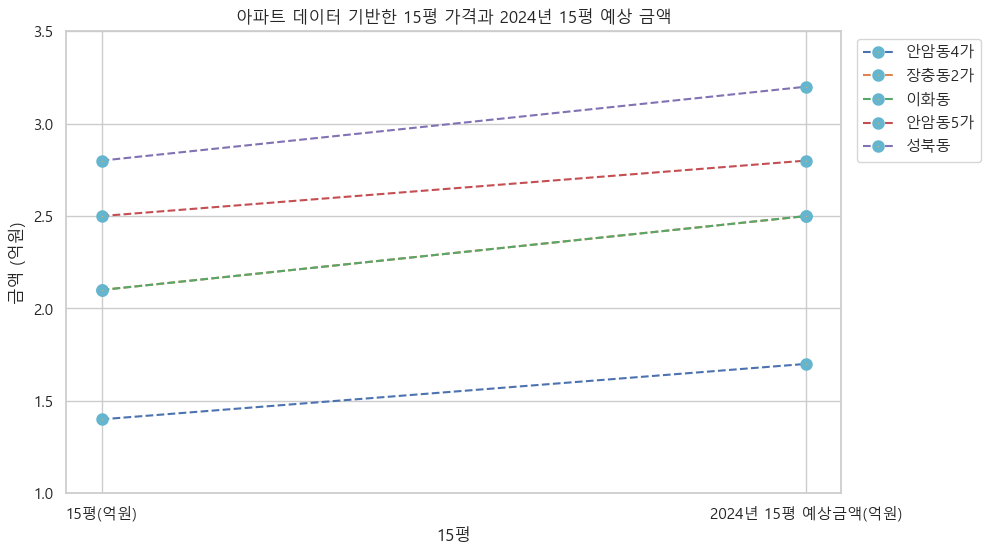

In [329]:


# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

for i, row in apartS.iterrows():
    plt.plot(['15평(억원)', '2024년 15평 예상금액(억원)'], [row['15평(억원)'], row['2024년 15평 예상금액(억원)']], label=row['법정동'], marker = 'o', ms = 5, mec = "c", mew = 4, mfc = 'y',ls= '--')

plt.xlabel('15평')
plt.ylabel('금액 (억원)')
plt.ylim(1,3.5)
plt.title('아파트 데이터 기반한 15평 가격과 2024년 15평 예상 금액')
plt.legend(bbox_to_anchor=(1.1, 1.0),loc = 'upper center')

plt.show()

# 하위 5개동의 2024년 15평 평균 금액의 평균

In [331]:
mean_low = apartS['2024년 15평 예상금액(억원)'].sum()/5
mean_low

2.54